In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys,os
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("../run/")
from run import run_scan

/Library/Python/2.7/site-packages/matplotlib-2.0.0b4+2617.ge794622-py2.7-macosx-10.10-intel.egg/matplotlib/cbook.py:128: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the matplotlib toolkit finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


This tutorial walks you through how to use the `run_scan` class to constrain the parameters of the Bulge and disk luminosity functions and perform frequentist model comparison.  The class has the following arguments and is described below through examples.

```
            :param fixed_params: Array of parameters to be held fixed
            :param fixed_param_vals: Array of values for parameters to be held fixed
            :param floated_params: Array of parameters to be floated
            :param floated_param_priors: Priors array for parameters to be floated
            :param data_dir: Directory containing the required maps
            :param Lmin: Minimum luminosity (erg s$^{-1}$)
            :param Lmax_disk: Maximum luminosity for disk (erg s$^{-1}$)
            :param Lmax_bulge: Maximum luminosity for bulge (erg s$^{-1}$)
            :param Ns: Number of integration point in z (kpc)
            :param Nang: Number of angular integration points
            :param smax_disk: How far to integrate out to for disk  (kpc)
            :param theta_mask: How many inner degrees to mask
            :param share_betas: Whether to float a single beta for disk and bulge
```

# Excercise 1: Compare the disk + bulge to the disk only, with most parameters fixed

As the first exercise, we will fix all of the parameters except for $N_B$ and $N_D$, the number of Bulge and disk sources, respectively, and we will compute the TS in favor of the model with the Bulge population.  We will show how to use both `multinest` and `minuit` to scan over the likelihood profile.  `minuit` is faster, but `multinest` can be more reliable, especially for parameter estimation.

_*Caution*_: there are more keywords than those desribed below available in the `run_scan` class.  See the code for details.

## Float $N_D$ and $N_B$

We initially start by floating the number of bulge and disk sources.  All other parameters are fixed below.  Note that we need to specify the prior ranges for the floated parameters.

In [2]:
fixed_params = ['n','sigma','alpha','beta_bulge','beta_disk','z0','Lmax_disk', 'Lmax_bulge']
fixed_param_vals = [2.35,1.528,2.6,1.2,1.2, 0.7,1.0e36,1.0e36]

floated_params = ['N_bulge','N_disk']
floated_param_priors = [[0,8000],[0,10000]]

Now, we initialize the main class

In [3]:
rs = run_scan(fixed_params, fixed_param_vals, floated_params, floated_param_priors, Ns = 200, Nang = 1)

### Using Minuit

First, we run using `minuit`

In [4]:
rs.perform_scan_minuit()

FCN = 326.001574522 
 TOTAL NCALL = 107 
 NCALLS = 107 
 
 
 EDM = 1.31276808411e-09 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,N_bulge,6.004125e+02,3.219196e+02,0.000000e+00,0.000000e+00,0.0,8000.0,
2,N_disk,3.226462e+03,8.137923e+02,0.000000e+00,0.000000e+00,0.0,10000.0,


### Using MultiNest

Next, with `multinest`

In [6]:
rs.perform_scan_multinest(chains_dir='../run/chains/DiskAndBulge/')

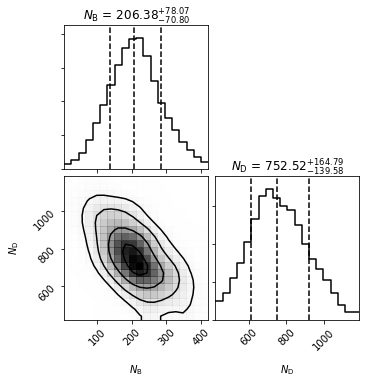

In [7]:
rs.plot_corner(labels = ['$N_\mathrm{B}$','$N_\mathrm{D}$'], chains_dir='../run/chains/DiskAndBulge/')

## Float only $N_D$

Now, we will fix the same parameters but only include a disk population.  We do this by fixing the number of Bulge sources to zero.

In [5]:
fixed_params = ['n','sigma','alpha','beta_bulge','beta_disk','z0','N_bulge','Lmax_disk', 'Lmax_bulge']
fixed_param_vals = [2.35,1.528,2.6,1.2,1.2, 0.7,0,1.0e36,1.0e36]

floated_params = ['N_disk']
floated_param_priors = [[0,10000]]

### Using Minuit

In [6]:
rs_nd = run_scan(fixed_params, fixed_param_vals, floated_params, floated_param_priors, Ns = 200, Nang = 1)

In [7]:
rs_nd.perform_scan_minuit()

FCN = 330.339298454 
 TOTAL NCALL = 49 
 NCALLS = 49 
 
 
 EDM = 2.03731780862e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,N_disk,4.511980e+03,6.632771e+02,0.000000e+00,0.000000e+00,0.0,10000.0,


### Using MultiNest

In [13]:
rs_nd.perform_scan_multinest(chains_dir='../run/chains/DiskOnly/')

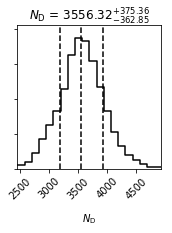

In [14]:
rs_nd.plot_corner(labels = ['$N_\mathrm{D}$'], chains_dir='../run/chains/DiskOnly/')

## Compute the test statistic for $N_D$ vs. $N_D$ and $N_B$

The max likelihood is computed in the `minuit` stage (though it may also be extracted from the `samples` generated during the `multinest` stage, if that is also run).  Here, we use the `max_LL` to compute the TS, which is the final result of the calculation.

In [8]:
TS = 2* (rs.max_LL - rs_nd.max_LL)
print "The TS = ", TS, ", which means the evidence for the Bulge PS population is ", np.sqrt(TS), " sigma"

The TS =  8.67544786349 , which means the evidence for the Bulge PS population is  2.94541132331  sigma


# Exercise 2: floating more parameters

It is easy to float more parameters.  Below, we give a few examples for this.  We will only use `minuit` here, since it is faster.

## Float $N_D$, $N_B$ and $z_0$

First, let's float $z_0$

In [9]:
fixed_params = ['n','sigma','alpha','Lmax_disk', 'Lmax_bulge','beta_bulge','beta_disk']
fixed_param_vals = [2.35,1.528,2.6,1.0e36,1.0e36,1.2,1.2]

floated_params = ['N_bulge','N_disk','z0']
floated_param_priors = [[0,8000],[0,10000],[0.2,1.5]]

In [10]:
rs_z0 = run_scan(fixed_params, fixed_param_vals, floated_params, floated_param_priors, Ns = 200, Nang = 1)

In [11]:
rs_z0.perform_scan_minuit()

FCN = 325.971859822 
 TOTAL NCALL = 201 
 NCALLS = 201 
 
 
 EDM = 4.25530343466e-08 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,N_bulge,5.926611e+02,3.230049e+02,0.000000e+00,0.000000e+00,0.0,8000.0,
2,N_disk,3.197849e+03,8.214889e+02,0.000000e+00,0.000000e+00,0.0,10000.0,
3,z0,7.436407e-01,2.537301e-01,0.000000e+00,0.000000e+00,0.2,1.5,


We can compute how much floating $z_0$ improved the fit, versus the previous calculation where we fixed $z_0$

In [12]:
TS = 2*(rs_z0.max_LL - rs.max_LL)
print "TS = ", TS

TS =  0.0594293999607


So, floating $z_0$ doesn't appear to give us much improvement here

## Float $\beta$s together

We can float the $\beta$ parameters together or separately.  Here, we give an example where they are floated together.  That is, both $\beta_{bulge}$ and $\beta_{disk}$ are both equal to $\beta$, which is floated in the scan.

In [17]:
fixed_params = ['n','sigma','alpha','Lmax_disk', 'Lmax_bulge']
fixed_param_vals = [2.35,1.528,2.6,1.0e36,1.0e36]

floated_params = ['N_bulge','N_disk','z0','beta']
floated_param_priors = [[0,1000000],[0,1000000],[0.2,1.5],[1.1,2.0]]

In [18]:
rs_betas = run_scan(fixed_params, fixed_param_vals, floated_params, floated_param_priors, Ns = 200, Nang = 1, share_betas=True)

In [19]:
rs_betas.perform_scan_minuit()

FCN = 293.396372462 
 TOTAL NCALL = 495 
 NCALLS = 495 
 
 
 EDM = 1.80141572758e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,N_bulge,1.372669e+05,1.241304e+05,0.000000e+00,0.000000e+00,0.0,1000000.0,
2,N_disk,4.783271e+05,2.704687e+05,0.000000e+00,0.000000e+00,0.0,1000000.0,
3,z0,2.000000e-01,4.698237e-02,0.000000e+00,0.000000e+00,0.2,1.5,
4,beta,1.941552e+00,9.891151e-02,0.000000e+00,0.000000e+00,1.1,2.0,


In [20]:
TS = 2*(rs_betas.max_LL - rs.max_LL)
print "TS = ", TS

TS =  65.2104041202


Here, we see a significant change in the TS letting the $\beta$ float versus not letting it float.

## Floating $\beta_{disk}$, $\beta_{bulge}$, $L_{max}^{disk}$, and $L_{max}^{bulge}$

Now, we will float $\beta_{disk}$, $\beta_{bulge}$, $z_0$, $L_{max}^{disk}$, and $L_{max}^{bulge}$.  First we will do the model with the disk and bulge and then we will do the disk only.  At the end, we will compute the TS.

In [28]:
fixed_params = ['n','sigma','alpha','z0']
fixed_param_vals = [2.35,1.528,2.6,0.5]

floated_params = ['N_bulge','N_disk','Lmax_disk','Lmax_bulge','beta_disk','beta_bulge']
floated_param_priors = [[0,10000000],[0,100000000],[1e35,5.0e37],[1e35,5.0e37],[1.1,2.0],[1.1,2.0]]

In [29]:
rs_betas_Ls = run_scan(fixed_params, fixed_param_vals, floated_params, floated_param_priors, Ns = 200, Nang = 2)

In [30]:
rs_betas_Ls.perform_scan_minuit()

FCN = 311.024432252 
 TOTAL NCALL = 277 
 NCALLS = 277 
 
 
 EDM = 8.21286082631e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,N_bulge,1.420527e+03,4.286001e+02,0.000000e+00,0.000000e+00,0.0,10000000.0,
2,N_disk,1.964494e+03,6.598118e+02,0.000000e+00,0.000000e+00,0.0,100000000.0,
3,Lmax_disk,4.498854e+35,2.129245e+35,0.000000e+00,0.000000e+00,1e+35,5e+37,
4,Lmax_bulge,1.117144e+35,2.016612e+34,0.000000e+00,0.000000e+00,1e+35,5e+37,
5,beta_disk,1.100000e+00,9.895692e-03,0.000000e+00,0.000000e+00,1.1,2.0,
6,beta_bulge,1.100000e+00,4.850659e-03,0.000000e+00,0.000000e+00,1.1,2.0,


Now without the bulge

In [31]:
fixed_params = ['n','sigma','alpha','z0','Lmax_bulge','N_bulge']
fixed_param_vals = [2.35,1.528,2.6,0.5,1.0e36,0.0]

floated_params = ['N_disk','Lmax_disk','beta_disk']
floated_param_priors = [[0,100000000],[1e35,5.0e37],[1.1,2.0]]

In [32]:
rs_betas_Ls_nd = run_scan(fixed_params, fixed_param_vals, floated_params, floated_param_priors, Ns = 200, Nang = 2)

In [33]:
rs_betas_Ls_nd.perform_scan_minuit()

FCN = 307.53772765 
 TOTAL NCALL = 253 
 NCALLS = 253 
 
 
 EDM = 2.88921669288e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,N_disk,3.342630e+05,2.188673e+05,0.000000e+00,0.000000e+00,0.0,100000000.0,
2,Lmax_disk,3.407624e+37,4.153426e+37,0.000000e+00,0.000000e+00,1e+35,5e+37,
3,beta_disk,1.853933e+00,9.837439e-02,0.000000e+00,0.000000e+00,1.1,2.0,


In [34]:
TS = 2*(rs_betas_Ls.max_LL - rs_betas_Ls_nd.max_LL )
print "TS = ", TS

TS =  -6.97340920365


The above examples aren't very well conveged.  Maybe there are too many parameters for such a small scan, or maybe bigger issues.

# Exercise 3: increasing the accuracy

There are a few ways that the accuracy may be improved.
    1.  Integrate over more angular bins in each pixel, when computing the expected number of counts
    2.  Integrate over more `s` bins (i.e., over more bins in distance from the Earth), when computing the expected number of counts.
    3.  Using a prior on the number of sources.
Below, we will illustrate 2. and 3., since 1. is straightforward given 2.

## Integrate over angular bins

The `Nang` keyword gives the number of angular bins in the integrals, while `Ns` gives the number of `s` bins.  The larger these numbers, the more accurate.

In [35]:
fixed_params = ['n','sigma','alpha','beta_bulge','beta_disk','z0','Lmax_bulge','Lmax_disk']
fixed_param_vals = [2.35,1.528,2.6,1.2,1.2, 0.7,1.0e36,1.0e36]

floated_params = ['N_bulge','N_disk']
floated_param_priors = [[0,8000],[0,10000]]

In [36]:
rs_angint = run_scan(fixed_params, fixed_param_vals, floated_params, floated_param_priors, Ns = 200, Nang = 5)

In [37]:
rs_angint.perform_scan_minuit()

FCN = 328.083887071 
 TOTAL NCALL = 103 
 NCALLS = 103 
 
 
 EDM = 2.02757647717e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,N_bulge,7.695378e+02,3.667186e+02,0.000000e+00,0.000000e+00,0.0,8000.0,
2,N_disk,2.977830e+03,7.985076e+02,0.000000e+00,0.000000e+00,0.0,10000.0,


In [38]:
TS = 2* (rs_angint.max_LL -  rs.max_LL)
print "TS = ", TS

TS =  -4.16462509759


The above gives a sense for the error induced on the TS by only including 1 angular bins, versus including 5

## Use a prior on the total number of sources

Examples 1. and 2. did not include a prior on the observed number of sources.  It is easy to do this, as shown below.  Simply set `use_prior=True`.

In [39]:
fixed_params = ['n','sigma','alpha','beta_bulge','beta_disk','z0','Lmax_bulge','Lmax_disk']
fixed_param_vals = [2.35,1.528,2.6,1.2,1.2, 0.7,1.0e36,1.0e36]

floated_params = ['N_bulge','N_disk']
floated_param_priors = [[0,8000],[0,10000]]

In [40]:
rs_prior = run_scan(fixed_params, fixed_param_vals, floated_params, floated_param_priors, Ns = 200, Nang = 1, use_prior=True)

In [41]:
rs_prior.perform_scan_minuit()

FCN = 326.315482468 
 TOTAL NCALL = 104 
 NCALLS = 104 
 
 
 EDM = 8.11802116358e-10 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,N_bulge,5.765782e+02,3.204492e+02,0.000000e+00,0.000000e+00,0.0,8000.0,
2,N_disk,3.352197e+03,8.055992e+02,0.000000e+00,0.000000e+00,0.0,10000.0,


In [42]:
TS = 2* (rs_prior.max_LL -  rs.max_LL)
print "TS = ", TS

TS =  -0.627815891971


Again, the above gives a sense for the error induced on the TS by not including a prior.  In this example, it is pretty minimal.  Still, we can compute the TS in favor of the model with the bulge population, including the prior, but first we need to do the disk only:

In [43]:
fixed_params = ['n','sigma','alpha','beta_bulge','beta_disk','z0','Lmax_bulge','Lmax_disk','N_bulge']
fixed_param_vals = [2.35,1.528,2.6,1.2,1.2, 0.7,1.0e36,1.0e36,0.0]

floated_params = ['N_disk']
floated_param_priors = [[0,10000]]

In [44]:
rs_prior_nd = run_scan(fixed_params, fixed_param_vals, floated_params, floated_param_priors, Ns = 200, Nang = 1, use_prior=True)

In [45]:
rs_prior_nd.perform_scan_minuit()

FCN = 330.378520063 
 TOTAL NCALL = 49 
 NCALLS = 49 
 
 
 EDM = 7.65220253608e-08 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,N_disk,4.545223e+03,6.468124e+02,0.000000e+00,0.000000e+00,0.0,10000.0,


In [46]:
TS = 2* (rs_prior.max_LL -  rs_prior_nd.max_LL)
print "TS = ", TS
print "Sqrt(TS) = ", np.sqrt(TS)

TS =  8.12607519062
Sqrt(TS) =  2.85062715742
